This notebook is used to test the system simulator.

# Import libraries

In [1]:
from regelum.scenario import Scenario
from regelum.simulator import CasADi
import numpy as np
from tqdm.notebook import tqdm

import sys
sys.path.append('../')

from src.system import HydraulicSystem
from src.policy import PDController

In [2]:
from regelum.callback import (
    ScenarioStepLogger,
    # StateTracker,
    # HistoricalDataCallback,
)
from src.callback import HistoricalDataCallback, SimulatorStepLogger

from regelum import set_ipython_env
%matplotlib inline
callbacks = [SimulatorStepLogger, ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

# Run simulation

Instantiating Simulator, Policy, Scenario and run it

In [3]:
max_step = 1e-7
sampling_time = 1e-3 # 1e-3
final_time = 10e-3 # 10e-3

# Define the initial state (initial position of the kinematic point).
p_atm = 1e5
initial_state = np.array([1e3, 0, 0, p_atm, p_atm])

# Initialize the kinematic point system.
hydr_system = HydraulicSystem(
    init_state=initial_state
)

# Instantiate a simulator for the hydraulic system
simulator = CasADi(
    system=hydr_system, 
    state_init=initial_state, 
    time_final=final_time, 
    max_step=max_step,
    # rtol=1e-10,
    # atol=1e-10,
)

pd_policy = PDController(
    system=hydr_system,
    sampling_time=sampling_time,
    P_coef=25,
)

scenario = Scenario(
    policy=PDController(
        system=hydr_system,
        sampling_time=sampling_time
    ),
    simulator=simulator,
    sampling_time=sampling_time,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()

[20:23:52] INFO     runn. objective: 0.00, state est.: [     0.      0. 100000. 100000.],          ]8;id=124229;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=574935;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     0.      0. 100000. 100000.], action: [20.], value: 0.0000,                  
                    time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                                              

[20:23:55] INFO     runn. objective: 0.00, state est.: [     0.22    432.48 109633.37 100252.12],  ]8;id=889783;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=277197;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     0.22    432.48 109633.37 100252.12], action: [20.], value:                  
                    0.0000, time: 0.0010 (10.0%), episode: 1/1, iteration: 1/1                                     

[20:23:57] INFO     runn. objective: 0.00, state est.: [     0.79    694.23 110029.45 100650.48],  ]8;id=247904;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=342825;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     0.79    694.23 110029.45 100650.48], action: [14.67],                       
                    value: 0.0000, time: 0.0020 (20.0%), episode: 1/1, iteration: 1/1                              

[20:23:59] INFO     runn. objective: 0.00, state est.: [     1.51    738.48 110113.3  100737.24],  ]8;id=602711;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=403502;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     1.51    738.48 110113.3  100737.24], action: [5.3], value:                  
                    0.0000, time: 0.0030 (30.0%), episode: 1/1, iteration: 1/1                                     

[20:24:01] INFO     runn. objective: 0.00, state est.: [     2.15    563.61 109803.26 100430.14],  ]8;id=371057;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=713250;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.15    563.61 109803.26 100430.14], action: [-3.1], value:                 
                    0.0000, time: 0.0040 (40.0%), episode: 1/1, iteration: 1/1                                     

[20:24:04] INFO     runn. objective: 0.00, state est.: [     2.56    275.13 109474.2  100102.59],  ]8;id=580501;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=632256;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.56    275.13 109474.2  100102.59], action: [-8.42],                       
                    value: 0.0000, time: 0.0050 (50.0%), episode: 1/1, iteration: 1/1                              

[20:24:06] INFO     runn. objective: 0.00, state est.: [     2.68      0.3  109326.56 100000.  ],  ]8;id=135857;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=367422;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.68      0.3  109326.56 100000.  ], action: [-9.96],                       
                    value: 0.0000, time: 0.0060 (60.0%), episode: 1/1, iteration: 1/1                              

[20:24:08] INFO     runn. objective: 0.00, state est.: [     2.68      0.78 108711.13 100000.  ],  ]8;id=79361;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=221157;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.68      0.78 108711.13 100000.  ], action: [-9.98],                       
                    value: 0.0000, time: 0.0070 (70.0%), episode: 1/1, iteration: 1/1                              

[20:24:11] INFO     runn. objective: 0.00, state est.: [     2.68      0.53 108130.98 100000.  ],  ]8;id=542956;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=829869;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.68      0.53 108130.98 100000.  ], action: [-9.99],                       
                    value: 0.0000, time: 0.0080 (80.0%), episode: 1/1, iteration: 1/1                              

[20:24:13] INFO     runn. objective: 0.00, state est.: [     2.68      0.03 107599.09 100000.  ],  ]8;id=295788;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=598275;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.68      0.03 107599.09 100000.  ], action: [-10.], value:                 
                    0.0000, time: 0.0090 (90.0%), episode: 1/1, iteration: 1/1                                     

[20:24:15] INFO     runn. objective: 0.00, state est.: [     2.68      1.6  107046.21 100000.  ],  ]8;id=320539;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=243484;file:///Users/vulf/.pyenv/versions/3.11.8/envs/acm-env/lib/python3.11/site-packages/regelum/callback.py#1109\1109]8;;\
                    observation: [     2.68      1.6  107046.21 100000.  ], action: [-10.02],                      
                    value: 0.0000, time: 0.0100 (100.0%), episode: 1/1, iteration: 1/1                             

In [4]:
system_states = np.array(callbacks[0].system_states)

In [5]:
system_states[-1,:]

array([ 1.00073089e+03,  2.10702339e-01, -2.02587315e+01,  1.07045868e+05,
        1.00000000e+05])

In [6]:
times = np.array(callbacks[0].times)
system_states = np.array(callbacks[0].system_states)
system_states.shape

(100002, 5)

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],hydraulic pressure [Pa],working pressure [Pa]
0,0.000000,0,0.0,1,1,20.000000,0.000000,0.000000,100000.000000,100000.000000
1,0.001000,0,0.0,1,1,20.000000,0.217593,432.482033,109633.368292,100252.119312
2,0.002000,0,0.0,1,1,14.672232,0.791817,694.231121,110029.445426,100650.478170
3,0.003000,0,0.0,1,1,5.301812,1.510236,738.475859,110113.295669,100737.235395
4,0.004000,0,0.0,1,1,-3.101204,2.154485,563.610518,109803.264140,100430.139182
5,0.005000,0,0.0,1,1,-8.419015,2.562195,275.134635,109474.201574,100102.591506
6,0.006000,0,0.0,1,1,-9.962310,2.680517,0.298626,109326.561638,100000.000130
7,0.007000,0,0.0,1,1,-9.976768,2.681626,0.777985,108711.126952,100000.001380
8,0.008000,0,0.0,1,1,-9.990397,2.682671,0.528241,108130.976231,100000.001218
9,0.009000,0,0.0,1,1,-10.002892,2.683629,0.031764,107599.094024,100000.000277


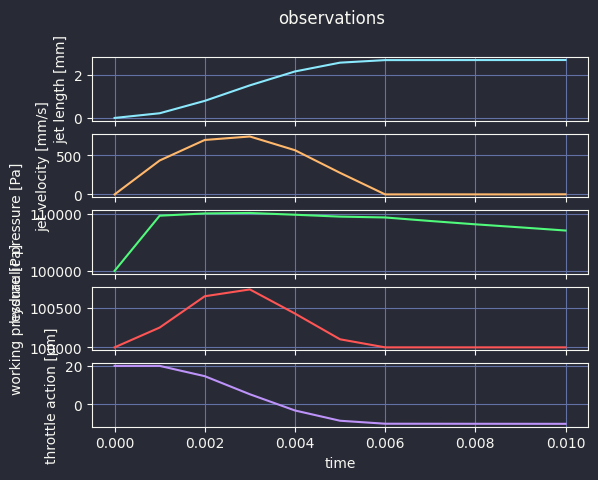

In [7]:
display(callbacks[-1].data)
callbacks[-1].plot(name="observations");